By: Christian Amstrup Petersen.
Student number: 202104742
\appendix
\newcommand\m[1]{\begin{bmatrix}#1\end{bmatrix}} 

In [52]:
import numpy as np
import matplotlib.pyplot as plt  
import matplotlib as mpl
mpl.rcParams['lines.marker'] = 'o'

# Variables to adjust grid size
gridWidth = 5 
gridHeight = 8

# Resuable functions and variables

# Plots the given x- and y-coordinates
def plot(x,y, xLim=None, yLim=None):
    fig, ax = plt.subplots(figsize=(gridWidth,gridHeight))
    plt.grid()
    if xLim != None:
        plt.xlim(xLim[0], xLim[1])
    if yLim != None:
        plt.ylim(yLim[0], yLim[1])
    ax.plot(x,y)

# Plots multiple figures in the same plot/grid. Used for comparisson between a modified, and non-modified figure. If 'withLabels' is set to true, will include labels on each plot.
# The parameter for this function should then be: (pointValuesList: [[x1, y1, label1], [x2, y2, label2], ... [x_n, y_n, label_n]], withLabels: True)
def plotMultiple(pointValuesList, withLabels = False):
    fig, ax = plt.subplots(figsize=(gridWidth,gridHeight))
    plt.grid()
    for values in pointValuesList:
        if withLabels:
            ax.plot(values[0], values[1], label=values[2])
        else:
            ax.plot(values[0], values[1])
    ax.legend()

\section{The data}

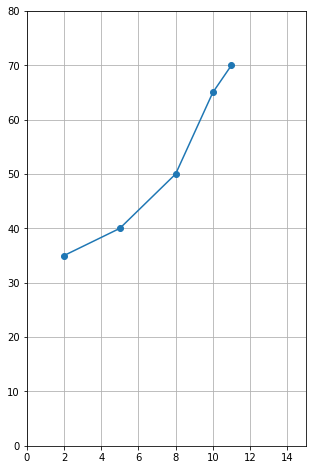

In [21]:
time = np.array([2.0, 5.0, 8.0, 10.0, 11.0])
temperature = np.array([35.0, 40.0, 50.0, 65.0, 70.0])

plot(time, temperature, [0, 15], [0, 80])

\section{The estimat}



In [80]:
#Returns the vector representing p(x)
def p(x):
    return np.array([1, x, x**2])

a = np.array([p(8.), p(10.), p(11.)])

# Vector representing the values on the right-side, of the equations 
b = np.array([50., 65., 70.])[:, np.newaxis]

#Extended matrix
aeb = np.hstack([a, b])
print(aeb)


[[  1.   8.  64.  50.]
 [  1.  10. 100.  65.]
 [  1.  11. 121.  70.]]


[[  1.   8.  64.  50.]
 [  0.   2.  36.  15.]
 [  1.  11. 121.  70.]]
[[ 1.  8. 64. 50.]
 [ 0.  2. 36. 15.]
 [ 0.  3. 57. 20.]]
[[  1.   0. -80. -10.]
 [  0.   2.  36.  15.]
 [  0.   3.  57.  20.]]
[[  1.    0.  -80.  -10. ]
 [  0.    1.   18.    7.5]
 [  0.    3.   57.   20. ]]
[[  1.    0.  -80.  -10. ]
 [  0.    1.   18.    7.5]
 [  0.    0.    3.   -2.5]]
[[  1.    0.  -80.  -10. ]
 [  0.    1.    0.   22.5]
 [  0.    0.    3.   -2.5]]
[[  1.           0.         -80.         -10.        ]
 [  0.           1.           0.          22.5       ]
 [  0.           0.           1.          -0.83333333]]
[[  1.           0.           0.         -76.66666667]
 [  0.           1.           0.          22.5       ]
 [  0.           0.           1.          -0.83333333]]
x: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
[-7.66666667e+01 -5.50000000e+01 -3.50000000e+01 -1.66666667e+01
  1.06581410e-14  1.50000000e+01  2.83333333e+01  4.00000000e+01
  5.00000000e+01  5.83333333e+01  6.50000000

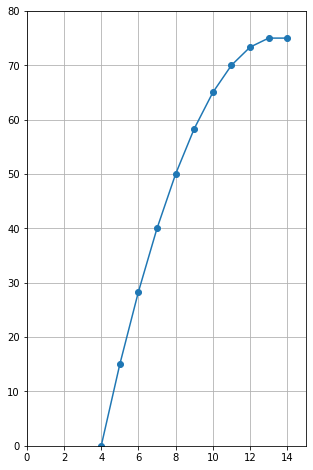

In [69]:

aeb = np.hstack([a, b])

#R1 - R0
aeb[1, :] -= aeb[0, :]

print(aeb)

#R2 - R0
aeb[2, :] -= aeb[0, :]

print(aeb)

#R0 - 4*R1
aeb[0, :] -= aeb[1,:]*4
print(aeb)

#R1 * 1/2
aeb[1, :] *= (1/2)

print(aeb)

#R2 - 3*R1
aeb[2, :] -= aeb[1,:]*3

print(aeb)

#R1 - 6*R2
aeb[1, :] -= aeb[2,:]*6

print(aeb)

#R2 * 1/3
aeb[2, :] *= (1/3)

print(aeb)

#R0 + R2*80
aeb[0, :] += aeb[2, :]*80

print(aeb)

pValues = aeb[:, 3]


def pDefinit(x):
    return pValues[0] + pValues[1]*x + pValues[2]*x**2

pDefVectorized = np.vectorize(pDefinit)

#print(pDefinit(8))
#print(pDefinit(10))

x = np.arange(0, 15, 1)
print("x:", x)
y = pDefVectorized(x)

print(y)

plot(x,y, [0,15], [0, 80])


\section{All points of data}

In [79]:
def p4(x):
    return np.array([1, x, x**2,x**3,x**4])

a = np.array([p4(2.), p4(5.), p4(8.), p4(10.), p4(11.)])

print(temperature)

print(a)

res = np.linalg.solve(a, temperature)

print(res)

[35. 40. 50. 65. 70.]
[[1.0000e+00 2.0000e+00 4.0000e+00 8.0000e+00 1.6000e+01]
 [1.0000e+00 5.0000e+00 2.5000e+01 1.2500e+02 6.2500e+02]
 [1.0000e+00 8.0000e+00 6.4000e+01 5.1200e+02 4.0960e+03]
 [1.0000e+00 1.0000e+01 1.0000e+02 1.0000e+03 1.0000e+04]
 [1.0000e+00 1.1000e+01 1.2100e+02 1.3310e+03 1.4641e+04]]
[-1.97530864 32.85493827 -9.09722222  1.03395062 -0.03858025]


\section{Multiple polynomiums}

In [84]:
p1_Values = np.array([p(5), p(8)])
p1_Results = np.array([40., 50.])

print(p1_Values)

print(np.linalg.solve(p1_Values, p1_Results))

def p1(x):
    return True

def p2(x):
    return False

def multiP(x):
    return 0


[[ 1  5 25]
 [ 1  8 64]]


LinAlgError: Last 2 dimensions of the array must be square